In [5]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt     
plt.rcParams['font.sans-serif'] = ['SimHei']    
plt.rcParams['axes.unicode_minus'] = False      

In [32]:
df = pd.read_excel('data.xlsx')

df['pts'] = df['pts'].astype(float)
df.head()

,name,season,pts
0,Chris Paul,2005,16.1
1,Chris Paul,2006,17.3
2,Chris Paul,2007,21.1
3,Chris Paul,2008,22.8
4,Chris Paul,2009,18.7


In [33]:
dta = df.iloc[:,2].values.tolist()
idx = df.iloc[:,1].values.tolist()

In [34]:
data=pd.Series(dta)
data.index=idx
data.head()

2005    16.1
2006    17.3
2007    21.1
2008    22.8
2009    18.7
dtype: float64

Text(0.5, 1.0, 'Chris Paul')

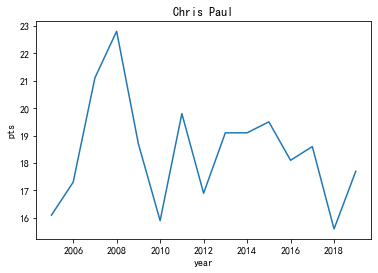

In [37]:
plt.figure()
plt.plot(data)
plt.xlabel('year')
plt.ylabel('pts')
plt.title('Chris Paul')

Text(0, 0.5, 'Lnpts')

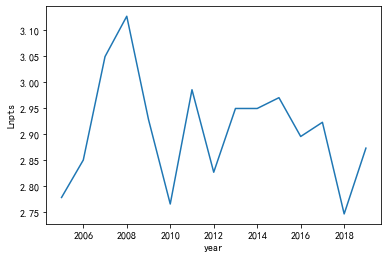

In [38]:

data = np.log(data)
plt.figure()
plt.plot(data)
plt.xlabel('year')
plt.ylabel('Lnpts')

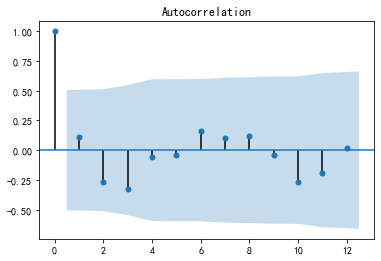

In [39]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data)
plt.show()

In [40]:

from statsmodels.tsa.stattools import adfuller
print(adfuller(data))

(-3.2795851078785585, 0.015816050679395913, 0, 14, {'1%': -4.01203360058309, '5%': -3.1041838775510207, '10%': -2.6909873469387753}, -18.449215436119996)


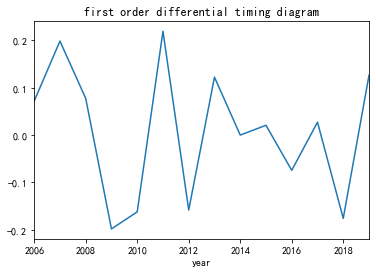

In [59]:

D_data = data.diff().dropna()
D_data.columns = [u'first order difference']

D_data.plot()   
plt.xlabel('year')
plt.title('first order differential timing diagram')
plt.show()

(-2.205623395805799, 0.20421082315122452, 4, 9, {'1%': -4.473135048010974, '5%': -3.28988060356653, '10%': -2.7723823456790124}, -18.12945250297617)


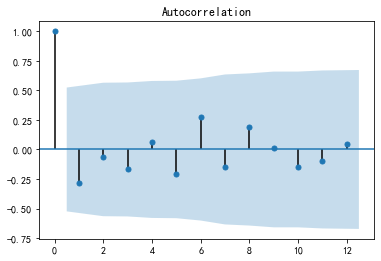

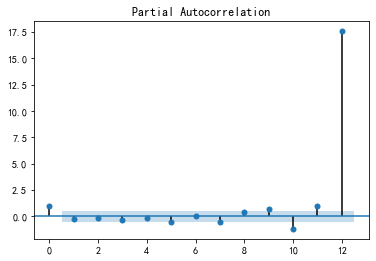

In [43]:
plot_acf(D_data)    
# plt.show()
plot_pacf(D_data)   
# plt.show()
print( adfuller(D_data))   


In [44]:

from statsmodels.stats.diagnostic import acorr_ljungbox
print(acorr_ljungbox(D_data, lags= 1)) 


(array([1.39301885]), array([0.23789595]))


In [45]:

from statsmodels.tsa.arima_model import ARIMA 

pmax = int(len(D_data) / 10)    
qmax = int(len(D_data) / 10)
bic_matrix = []

for p in range(pmax +1):
    temp= []
    for q in range(qmax+1):
        try:
            temp.append(ARIMA(data[:-2], (p, 1, q)).fit().bic)
        except:
            temp.append(None)
        bic_matrix.append(temp)

bic_matrix = pd.DataFrame(bic_matrix)   
p,q = bic_matrix.stack().idxmin()   
print((p,q))  

(0, 1)


C:\Users\wangs\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\wangs\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\wangs\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\wangs\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\wangs\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsup

In [46]:

df_res = bic_matrix.stack().reset_index()
df_res.columns = ['p' , 'q' , 'BIC']

df_res

,p,q,BIC
0,0,0,-9.558277
1,0,1,-10.709574
2,1,0,-9.558277
3,1,1,-10.709574
4,2,0,-7.670654
5,2,1,-8.611798
6,3,0,-7.670654
7,3,1,-8.611798


# p,1,q

In [47]:
model = ARIMA(data[:-2], (p,1,q)).fit()
model.summary2()      

C:\Users\wangs\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\wangs\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARIMA
==================================================================
Model:              ARIMA            BIC:                 -10.7096
Dependent Variable: D.y              Log-Likelihood:      9.0821  
Date:               2020-04-26 11:31 Scale:               1.0000  
No. Observations:   12               Method:              css-mle 
Df Model:           2                Sample:              1       
Df Residuals:       10                                    3       
Converged:          1.0000           S.D. of innovations: 0.102   
No. Iterations:     31.0000          HQIC:                -12.703 
AIC:                -12.1643                                      
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
const           0.0019    0.0076   0.2534  0.8051  -0.0129   0.0167
ma.L1.D.y      -1.0000    0.2421  -4.1305  0.0020  -1.4745  -0.5255
---------------------------------------------------------------------------
               Real           Imaginary          Modulus          Frequency
---------------------------------------------------------------------------
MA.1          1.0000             0.0000           1.0000             0.0000
==================================================================

"""

In [48]:

from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import r2_score#R 2
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

In [49]:
y_test = data[-2:].values
y_predict = model.forecast(2)[0]

In [50]:

print('mse = ' , mean_squared_error(y_test,y_predict))
print('mae = ' , mean_absolute_error(y_test,y_predict))
print('rmse = ' ,np.sqrt(mean_squared_error(y_test,y_predict)))  # RMSE
print('mape = ' , mape(y_test, y_predict))

mse =  0.020295003713029273
mae =  0.12817005638991952
rmse =  0.1424605338787879
mape =  4.612581527890634


In [51]:

df_res = pd.DataFrame()
df_res['year'] = data.index.tolist()[-2:]
df_res['pts_pred'] = np.exp(y_predict)
df_res['pts_true'] = np.exp(y_test)
df_res['error'] =( df_res['pts_pred']  - df_res['pts_true']) /  df_res['pts_true']

df_res

,year,pts_pred,pts_true,error
0,2018,18.871064,15.6,0.209684
1,2019,18.907259,17.7,0.068207


# p,2,q

In [52]:
model = ARIMA(data[:-2], (p,2,q)).fit()
model.summary2()       

C:\Users\wangs\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\wangs\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: ARIMA
=================================================================
Model:              ARIMA            BIC:                 -3.0108
Dependent Variable: D2.y             Log-Likelihood:      5.1022 
Date:               2020-04-26 11:31 Scale:               1.0000 
No. Observations:   11               Method:              css-mle
Df Model:           2                Sample:              2      
Df Residuals:       9                                     3      
Converged:          1.0000           S.D. of innovations: 0.136  
No. Iterations:     4.0000           HQIC:                -4.957 
AIC:                -4.2045                                      
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
const         -0.0066    0.0114  -0.5780  0.5775  -0.0288   0.0157
ma.L1.D2.y    -1.0000    0.2503  -3.9948  0.0031  -1.4906  -0.5094
-------------------------------------------------------------------------
                Real          Imaginary         Modulus         Frequency
-------------------------------------------------------------------------
MA.1           1.0000            0.0000          1.0000            0.0000
=================================================================

"""

In [53]:
y_test = data[-2:].values
y_predict = model.forecast(2)[0]

In [54]:

print('mse = ' , mean_squared_error(y_test,y_predict))
print('mae = ' , mean_absolute_error(y_test,y_predict))
print('rmse = ' ,np.sqrt(mean_squared_error(y_test,y_predict)))  # RMSE
print('mape = ' , mape(y_test, y_predict))

mse =  0.010259635823830712
mae =  0.08410102903951167
rmse =  0.10128986041964275
mape =  3.0391398361945847


In [55]:

df_res = pd.DataFrame()
df_res['year'] = data.index.tolist()[-2:]
df_res['pts_pred'] = np.exp(y_predict)
df_res['pts_true'] = np.exp(y_test)
df_res['error'] =( df_res['pts_pred']  - df_res['pts_true']) /  df_res['pts_true']

df_res

,year,pts_pred,pts_true,error
0,2018,17.954170,15.6,0.150908
1,2019,17.217289,17.7,-0.027272


In [56]:

y_predict = model.forecast(7)[0][2:]
y_predict

array([2.79743658, 2.74238997, 2.68077422, 2.61258932, 2.53783529])

In [57]:

df_pred = pd.DataFrame(np.zeros((2,5)) , columns = range(2020,2020+5))
df_pred.iloc[0,:] = y_predict
df_pred.iloc[1,:] = np.exp(y_predict)

df_pred.index = ['Lnpts' , 'pts']

df_pred

,2020,2021,2022,2023,2024
Lnpts,2.797437,2.742390,2.680774,2.612589,2.537835
pts,16.402546,15.524043,14.596390,13.634309,12.652253


Text(0.5, 1.0, '2020-2024 pts predict curve')

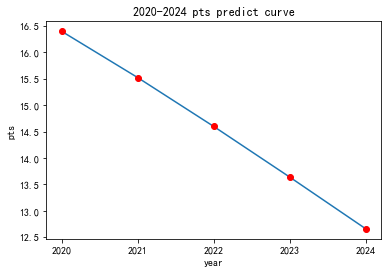

In [58]:
ax = plt.figure()
plt.plot(df_pred.columns, df_pred.iloc[1,:].tolist() )
plt.plot(df_pred.columns, df_pred.iloc[1,:].tolist() , 'ro')
plt.xticks(df_pred.columns.tolist() , df_pred.columns.tolist())
plt.xlabel('year')
plt.ylabel('pts')
plt.title('2020-2024 pts predict curve')